In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Python plotting library
import seaborn as sns # Better looking plotting library
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.linear_model import Ridge #ridge regression
from sklearn.model_selection import train_test_split
from math import sqrt
%matplotlib inline

In [3]:
movie = pd.read_csv('movie_metadata.csv') # reads the csv and creates the dataframe called movie


quant_variables = ['imdb_score', 'num_user_for_reviews', 'num_critic_for_reviews', 'duration', 
                   'director_facebook_likes', 'movie_facebook_likes', 'cast_total_facebook_likes',
                   'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                   'gross', 'num_voted_users', 'facenumber_in_poster', 'budget', 
                   'title_year', 'aspect_ratio']
moviedata = movie[quant_variables] #creating new dataframe with only the quantitative variables

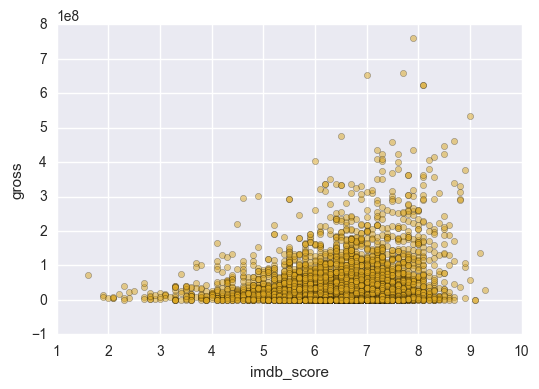

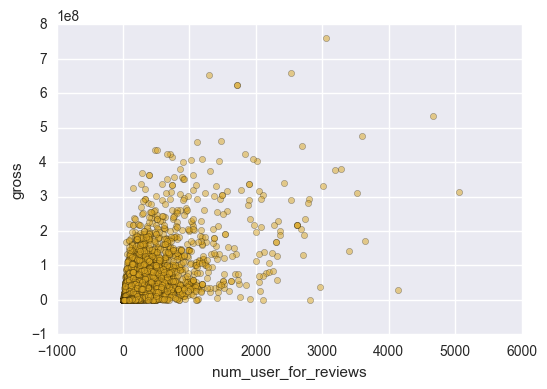

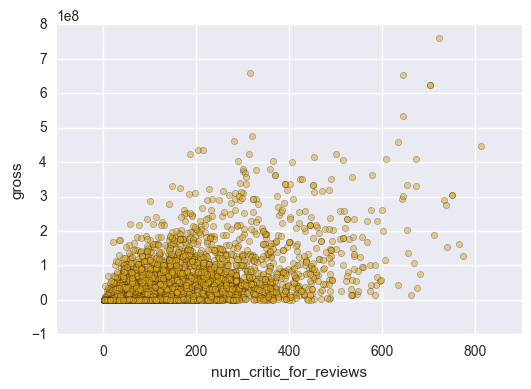

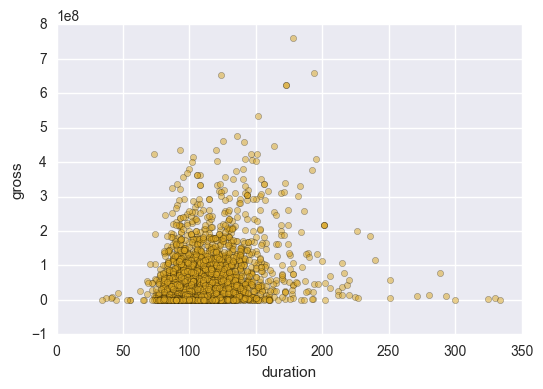

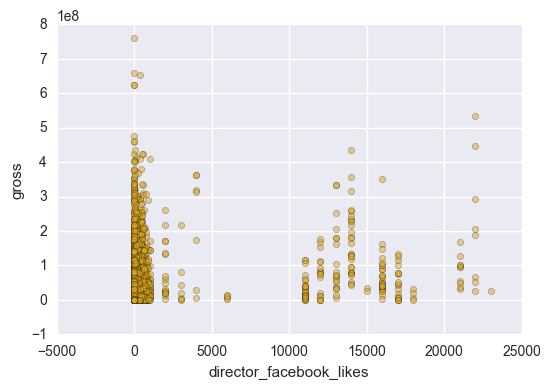

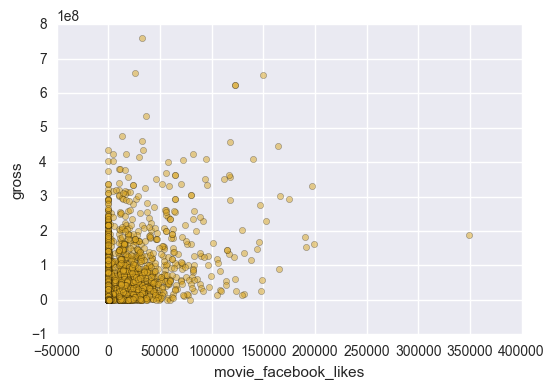

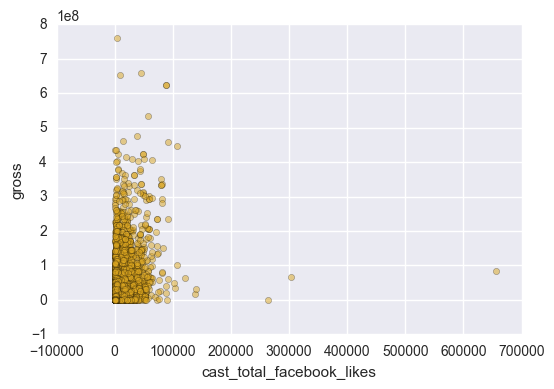

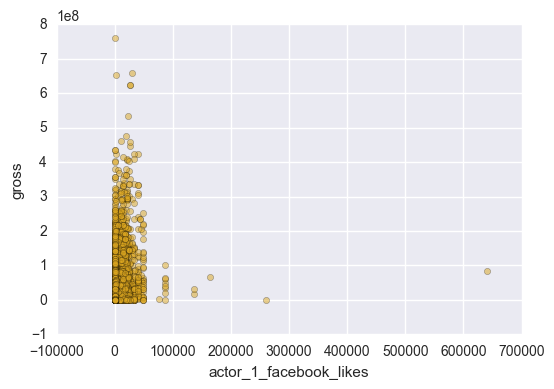

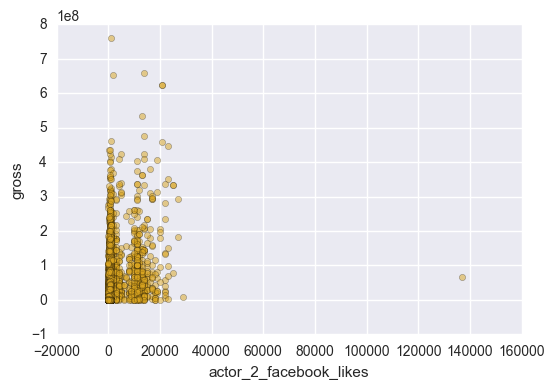

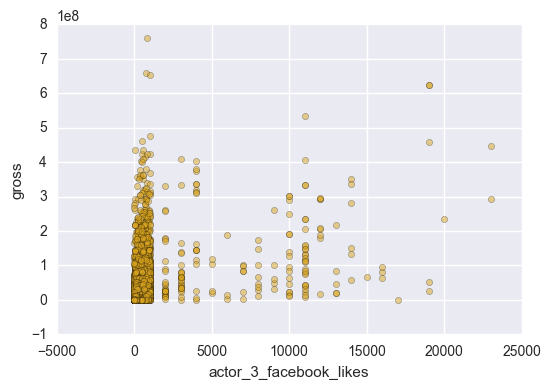

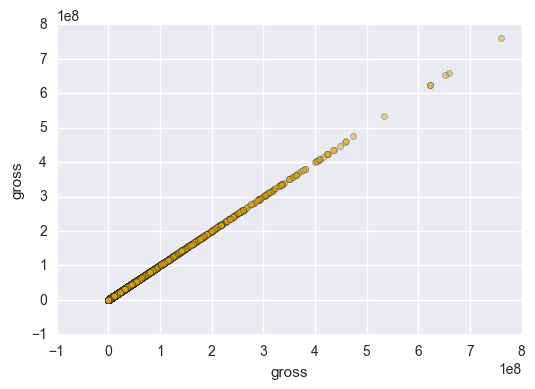

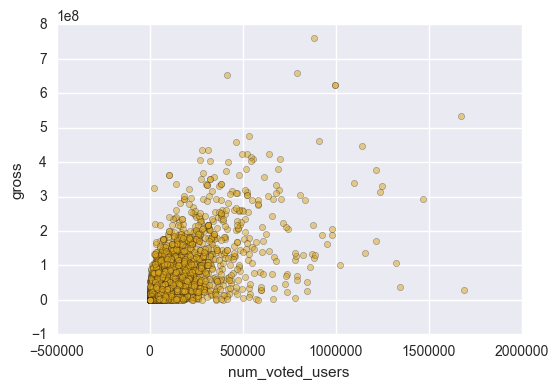

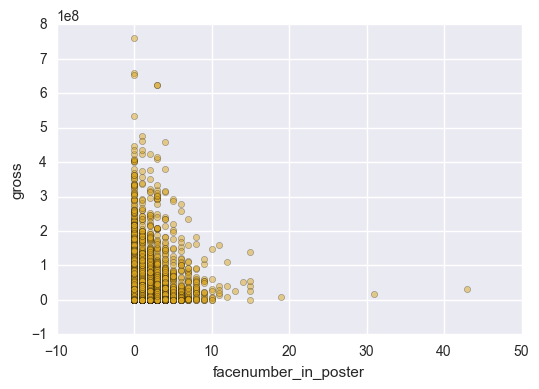

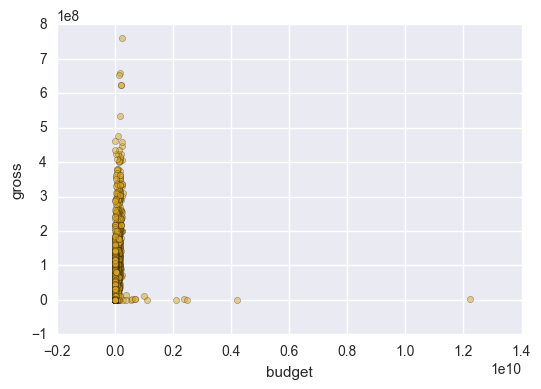

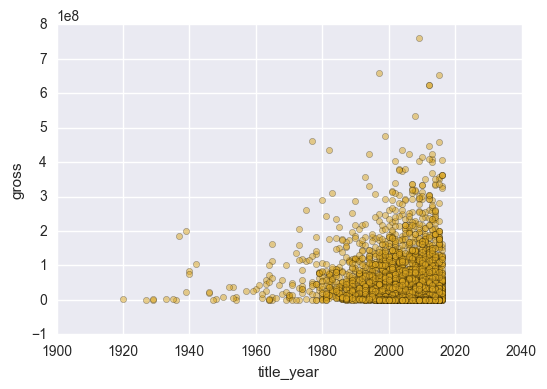

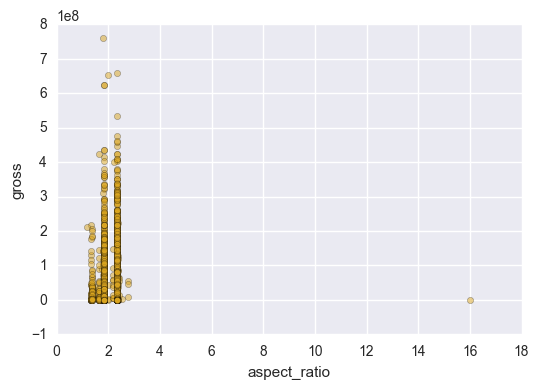

In [4]:
for variables in quant_variables: 
    movie.plot(y='gross', x=variables,kind='scatter', sharex=False, c='goldenrod',alpha=0.5)

,imdb_score,num_user_for_reviews,num_critic_for_reviews,duration,director_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio
imdb_score,1.000000,0.292475,0.305303,0.261662,0.170802,0.247049,0.085787,0.076099,0.083808,0.052633,0.198021,0.410965,-0.062958,0.030688,-0.209167,0.059445
num_user_for_reviews,0.292475,1.000000,0.609387,0.328403,0.221890,0.400594,0.206923,0.145461,0.219496,0.230189,0.559958,0.798406,-0.069018,0.084292,-0.003147,-0.024719
num_critic_for_reviews,0.305303,0.609387,1.000000,0.258486,0.180674,0.683176,0.263203,0.190016,0.282306,0.271646,0.480601,0.624943,-0.033897,0.119994,0.275707,-0.049786
duration,0.261662,0.328403,0.258486,1.000000,0.173296,0.196605,0.123074,0.088449,0.131673,0.123558,0.250298,0.314765,0.013469,0.074276,-0.135038,-0.090071
director_facebook_likes,0.170802,0.221890,0.180674,0.173296,1.000000,0.162048,0.119549,0.090723,0.119601,0.120199,0.144945,0.297057,-0.041268,0.021090,-0.063820,0.001642
movie_facebook_likes,0.247049,0.400594,0.683176,0.196605,0.162048,1.000000,0.209786,0.135348,0.243487,0.278844,0.378082,0.537924,0.008918,0.062039,0.218678,0.025737
cast_total_facebook_likes,0.085787,0.206923,0.263203,0.123074,0.119549,0.209786,1.000000,0.951661,0.628404,0.473920,0.247400,0.265911,0.091475,0.036557,0.109971,-0.017885
actor_1_facebook_likes,0.076099,0.145461,0.190016,0.088449,0.090723,0.135348,0.951661,1.000000,0.390487,0.249927,0.154468,0.192804,0.072257,0.022639,0.086873,-0.020049
actor_2_facebook_likes,0.083808,0.219496,0.282306,0.131673,0.119601,0.243487,0.628404,0.390487,1.000000,0.559662,0.262768,0.270790,0.071228,0.044236,0.101890,-0.007783
actor_3_facebook_likes,0.052633,0.230189,0.271646,0.123558,0.120199,0.278844,0.473920,0.249927,0.559662,1.000000,0.308026,0.287239,0.099368,0.047451,0.096137,-0.003366


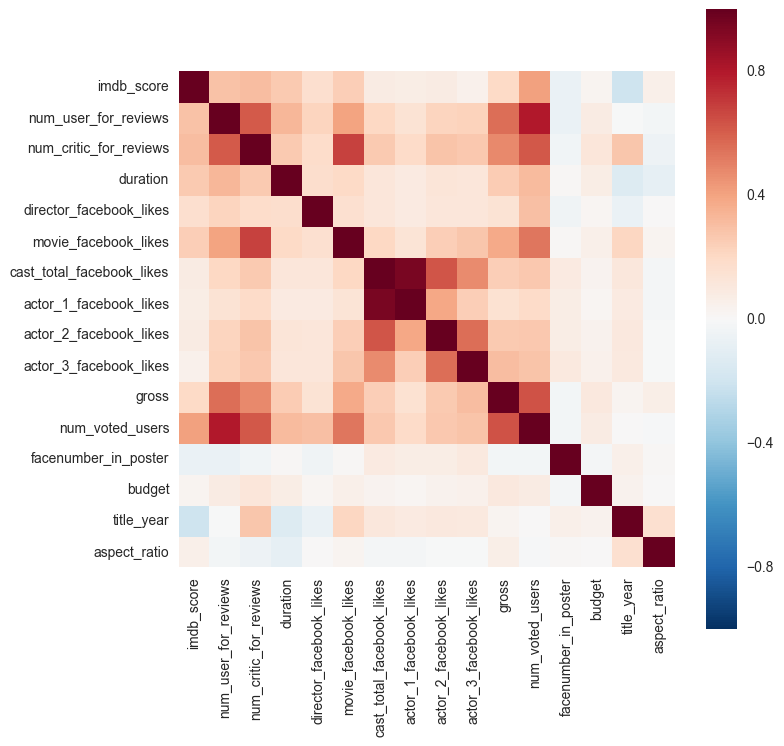

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(moviedata.astype(float).corr(), square=True)
moviedata.astype(float).corr()

In [6]:
moviedata['title_year'].min(), moviedata['title_year'].max()

(1916.0, 2016.0)

In [7]:
modern_movie_2010 = moviedata[movie.title_year > 2010] # trying this again to see if modern movies, defined as movies with titleyear>2005, have a different correlation

In [8]:
modern_movie_2010_removeNaN = modern_movie_2010.dropna()    

,imdb_score,num_user_for_reviews,num_critic_for_reviews,duration,director_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio
imdb_score,1.000000,0.339266,0.481809,0.345826,0.136283,0.416532,0.153936,0.123970,0.160404,0.108360,0.283427,0.429788,-0.066268,0.229795,-0.028035,-0.010201
num_user_for_reviews,0.339266,1.000000,0.824920,0.516994,0.276579,0.849528,0.303619,0.186032,0.347959,0.327931,0.638076,0.858353,-0.044706,0.615501,-0.062088,-0.058353
num_critic_for_reviews,0.481809,0.824920,1.000000,0.477836,0.259435,0.787398,0.312831,0.211429,0.362254,0.290080,0.553483,0.815672,-0.039607,0.566585,-0.160921,-0.110629
duration,0.345826,0.516994,0.477836,1.000000,0.238201,0.506338,0.240457,0.155687,0.267976,0.247881,0.359400,0.505812,0.094491,0.451899,0.034473,-0.022311
director_facebook_likes,0.136283,0.276579,0.259435,0.238201,1.000000,0.284850,0.124240,0.079039,0.149103,0.106739,0.134869,0.291095,-0.057817,0.134844,-0.044931,-0.013023
movie_facebook_likes,0.416532,0.849528,0.787398,0.506338,0.284850,1.000000,0.313742,0.204896,0.361409,0.321715,0.586783,0.849019,-0.031609,0.520506,-0.003507,-0.058651
cast_total_facebook_likes,0.153936,0.303619,0.312831,0.240457,0.124240,0.313742,1.000000,0.931633,0.685228,0.554187,0.357500,0.364163,0.136803,0.327678,-0.005260,-0.054094
actor_1_facebook_likes,0.123970,0.186032,0.211429,0.155687,0.079039,0.204896,0.931633,1.000000,0.414153,0.261702,0.197592,0.228906,0.110815,0.204539,0.004745,-0.051189
actor_2_facebook_likes,0.160404,0.347959,0.362254,0.267976,0.149103,0.361409,0.685228,0.414153,1.000000,0.684712,0.368286,0.412825,0.120940,0.375141,-0.021073,-0.033501
actor_3_facebook_likes,0.108360,0.327931,0.290080,0.247881,0.106739,0.321715,0.554187,0.261702,0.684712,1.000000,0.402059,0.388683,0.113660,0.355353,-0.023897,-0.028321


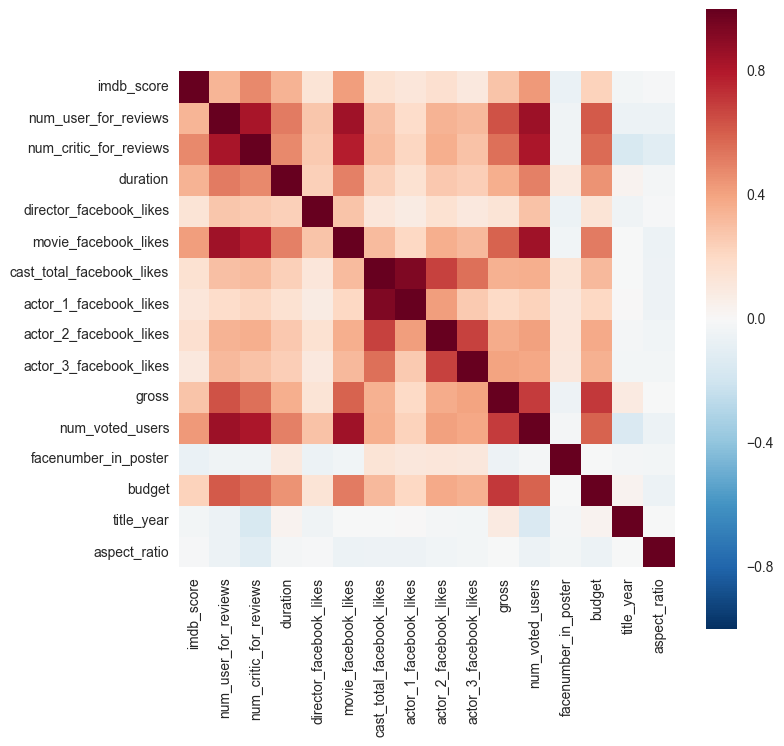

In [13]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(modern_movie_2010.astype(float).corr(), square=True)
len(modern_movie_2010) #size of data 
modern_movie_2010.astype(float).corr()


836

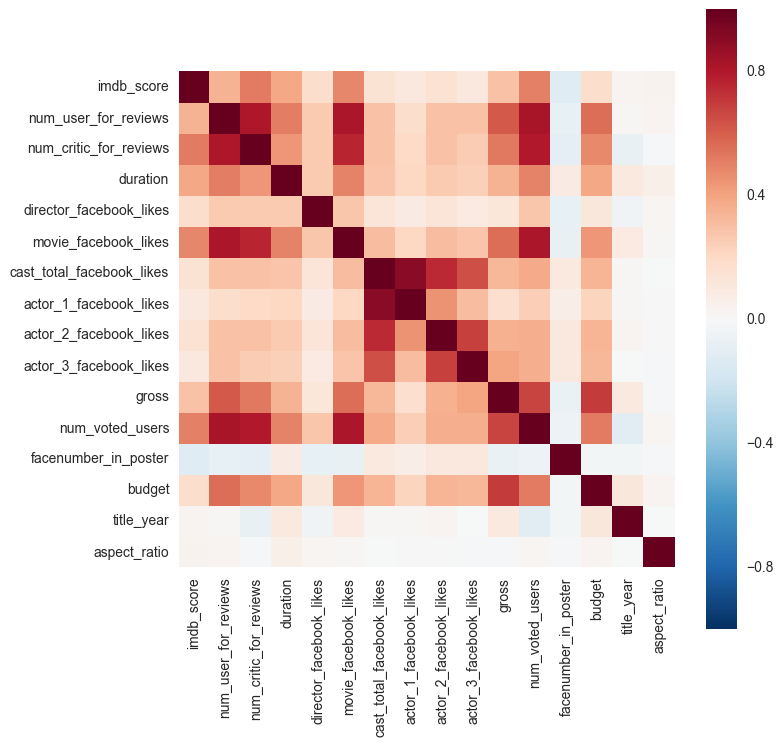

In [14]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(modern_movie_2010_removeNaN.astype(float).corr(), square=True)
len(modern_movie_2010_removeNaN) #size of data 

In [15]:
X = np.asarray(modern_movie_2010_removeNaN[["movie_facebook_likes", "duration", "budget"]])

In [16]:
y = np.asarray(modern_movie_2010_removeNaN["gross"])

In [17]:
clf = Ridge(alpha=1.0)
clf.fit(X, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
lalaland = np.array([1063593,127,30000000]).reshape((1, -1))
clf.predict(lalaland)

array([  8.51059480e+08])

In [19]:
clf.score(X,y)

0.56758728269429159

In [20]:
x = np.asarray(modern_movie_2010_removeNaN[["movie_facebook_likes","num_voted_users", "budget"]])

In [21]:
clf.fit(x, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
clf.score(x,y)

0.62381391178038548

In [23]:
lalaland = np.array([1063593,247767,30000000]).reshape((1, -1))
clf.predict(lalaland)

array([ 61962386.15945223])

In [24]:
modern_movie_2010_all_variables = movie[movie.title_year > 2010]
modern_movie_2010_all_variables_removeNaN = modern_movie_2010_all_variables.dropna()    
modern_movie_2010_director= modern_movie_2010_all_variables_removeNaN.groupby('director_name', as_index=False)
mean = modern_movie_2010_director.mean()

In [25]:
mean.sort_values('gross', ascending=False, inplace=True)
mean.rename(columns={'gross': 'Average_Director_Gross',}, inplace=True)
mean_gross = mean[["director_name","Average_Director_Gross"]]

,imdb_score,num_user_for_reviews,num_critic_for_reviews,duration,director_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio,Average_Director_Gross
imdb_score,1.000000,0.351866,0.540517,0.381139,0.177999,0.497011,0.147486,0.109791,0.154588,0.104520,0.300719,0.512073,-0.118066,0.181662,0.020768,0.038575,0.285707
num_user_for_reviews,0.351866,1.000000,0.806321,0.513786,0.263301,0.816620,0.286109,0.171260,0.286443,0.287710,0.612755,0.825281,-0.090312,0.553626,0.015650,0.027946,0.562707
num_critic_for_reviews,0.540517,0.806321,1.000000,0.449624,0.260043,0.760694,0.278948,0.187416,0.289062,0.247068,0.519547,0.801391,-0.108770,0.471619,-0.066651,-0.007813,0.482459
duration,0.381139,0.513786,0.449624,1.000000,0.265174,0.498380,0.288253,0.210284,0.259103,0.240905,0.347414,0.497297,0.082759,0.385238,0.092533,0.066616,0.344550
director_facebook_likes,0.177999,0.263301,0.260043,0.265174,1.000000,0.273665,0.124039,0.083044,0.128960,0.089588,0.121444,0.278541,-0.080171,0.108475,-0.041339,0.017685,0.134931
movie_facebook_likes,0.497011,0.816620,0.760694,0.498380,0.273665,1.000000,0.300701,0.200334,0.304082,0.283264,0.554186,0.815384,-0.079834,0.437635,0.094165,0.013867,0.498632
cast_total_facebook_likes,0.147486,0.286109,0.278948,0.288253,0.124039,0.300701,1.000000,0.900271,0.748527,0.643610,0.328466,0.369029,0.091374,0.337617,0.019067,0.000327,0.306684
actor_1_facebook_likes,0.109791,0.171260,0.187416,0.210284,0.083044,0.200334,0.900271,1.000000,0.442793,0.308341,0.162779,0.235672,0.058840,0.218626,0.013609,0.002095,0.152909
actor_2_facebook_likes,0.154588,0.286443,0.289062,0.259103,0.128960,0.304082,0.748527,0.442793,1.000000,0.683330,0.351700,0.361020,0.106001,0.334199,0.032345,0.005991,0.331150
actor_3_facebook_likes,0.104520,0.287710,0.247068,0.240905,0.089588,0.283264,0.643610,0.308341,0.683330,1.000000,0.391881,0.357433,0.104712,0.326490,0.001208,-0.010217,0.356680


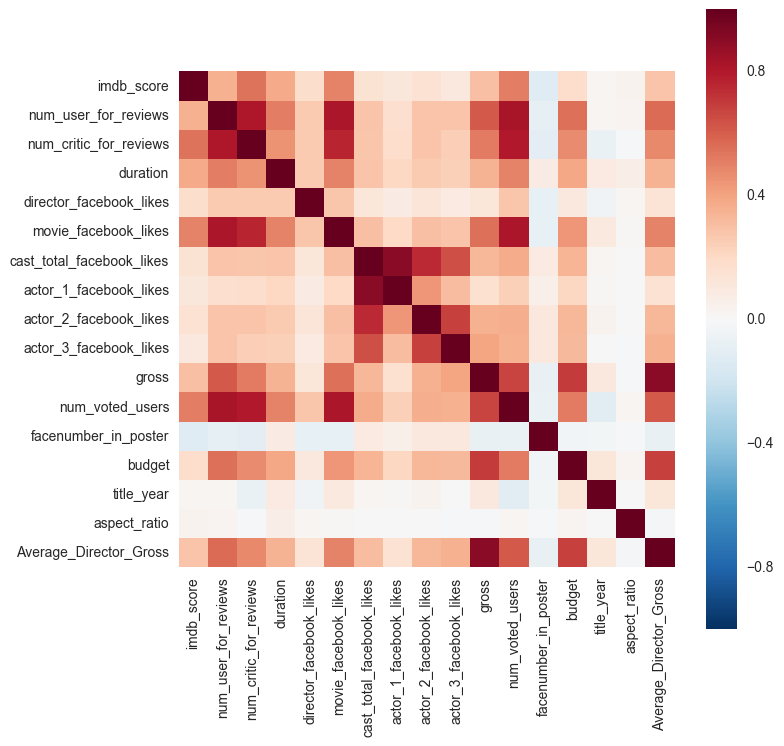

In [38]:
modern_movie_with_average_director_gross = pd.merge(modern_movie_2010_all_variables_removeNaN,mean_gross,on="director_name")
modern_movie_with_average_director_gross_quant = modern_movie_with_average_director_gross[quant_variables+["Average_Director_Gross"]]    
f, ax = plt.subplots(figsize=(8, 8))
len(modern_movie_with_average_director_gross) #size of data         
sns.heatmap(modern_movie_with_average_director_gross_quant.astype(float).corr(), square=True)

modern_movie_with_average_director_gross_quant.astype(float).corr()        

In [27]:
x = np.asarray(modern_movie_with_average_director_gross[["Average_Director_Gross", "movie_facebook_likes", "budget"]])
y = np.asarray(modern_movie_with_average_director_gross["gross"])

In [28]:
clf.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
mean_gross.loc[mean_gross['director_name'] == "Damien Chazelle"]

,director_name,Average_Director_Gross
107,Damien Chazelle,13092000.0


In [30]:
lalaland = np.array([1309200,1063593,30000000]).reshape((1, -1))
clf.predict(lalaland)

array([  3.16518725e+08])

In [31]:
clf.score(x,y)

0.83390611836162221

In [32]:
list(movie.columns.values)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [33]:
modern_movie_2010_all_variables = movie[movie.title_year > 2010]
modern_movie_2010_all_variables_removeNaN = modern_movie_2010_all_variables.dropna()    
modern_movie_2010_actor_1= modern_movie_2010_all_variables_removeNaN.groupby('actor_1_name', as_index=False)
mean = modern_movie_2010_actor_1.mean()

In [34]:
mean.sort_values('gross', ascending=False, inplace=True)
mean.rename(columns={'gross': 'Average_Actor_1_Gross',}, inplace=True)
mean_gross_actor_1 = mean[["actor_1_name","Average_Actor_1_Gross"]]

,imdb_score,num_user_for_reviews,num_critic_for_reviews,duration,director_facebook_likes,movie_facebook_likes,cast_total_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,facenumber_in_poster,budget,title_year,aspect_ratio,Average_Director_Gross,Average_Actor_1_Gross
imdb_score,1.000000,0.351866,0.540517,0.381139,0.177999,0.497011,0.147486,0.109791,0.154588,0.104520,0.300719,0.512073,-0.118066,0.181662,0.020768,0.038575,0.285707,0.231674
num_user_for_reviews,0.351866,1.000000,0.806321,0.513786,0.263301,0.816620,0.286109,0.171260,0.286443,0.287710,0.612755,0.825281,-0.090312,0.553626,0.015650,0.027946,0.562707,0.428645
num_critic_for_reviews,0.540517,0.806321,1.000000,0.449624,0.260043,0.760694,0.278948,0.187416,0.289062,0.247068,0.519547,0.801391,-0.108770,0.471619,-0.066651,-0.007813,0.482459,0.412378
duration,0.381139,0.513786,0.449624,1.000000,0.265174,0.498380,0.288253,0.210284,0.259103,0.240905,0.347414,0.497297,0.082759,0.385238,0.092533,0.066616,0.344550,0.265489
director_facebook_likes,0.177999,0.263301,0.260043,0.265174,1.000000,0.273665,0.124039,0.083044,0.128960,0.089588,0.121444,0.278541,-0.080171,0.108475,-0.041339,0.017685,0.134931,0.053730
movie_facebook_likes,0.497011,0.816620,0.760694,0.498380,0.273665,1.000000,0.300701,0.200334,0.304082,0.283264,0.554186,0.815384,-0.079834,0.437635,0.094165,0.013867,0.498632,0.399650
cast_total_facebook_likes,0.147486,0.286109,0.278948,0.288253,0.124039,0.300701,1.000000,0.900271,0.748527,0.643610,0.328466,0.369029,0.091374,0.337617,0.019067,0.000327,0.306684,0.329843
actor_1_facebook_likes,0.109791,0.171260,0.187416,0.210284,0.083044,0.200334,0.900271,1.000000,0.442793,0.308341,0.162779,0.235672,0.058840,0.218626,0.013609,0.002095,0.152909,0.229977
actor_2_facebook_likes,0.154588,0.286443,0.289062,0.259103,0.128960,0.304082,0.748527,0.442793,1.000000,0.683330,0.351700,0.361020,0.106001,0.334199,0.032345,0.005991,0.331150,0.321633
actor_3_facebook_likes,0.104520,0.287710,0.247068,0.240905,0.089588,0.283264,0.643610,0.308341,0.683330,1.000000,0.391881,0.357433,0.104712,0.326490,0.001208,-0.010217,0.356680,0.298274


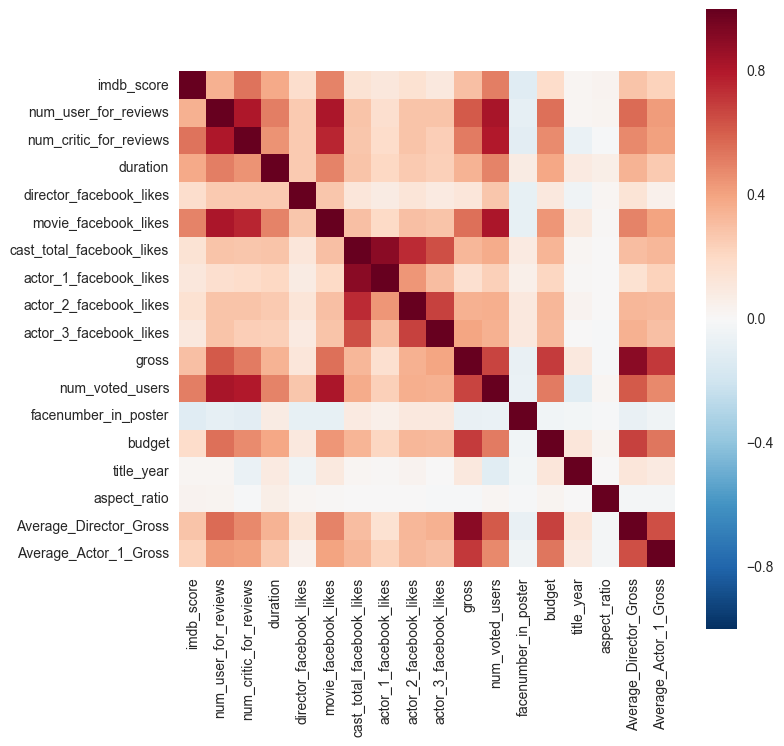

In [35]:
modern_movie_with_director_actor_1 = pd.merge(modern_movie_with_average_director_gross,mean_gross_actor_1,on="actor_1_name")
modern_movie_with_director_actor_1_quant = modern_movie_with_director_actor_1[quant_variables+["Average_Director_Gross","Average_Actor_1_Gross"]]    
f, ax = plt.subplots(figsize=(8, 8))
len(modern_movie_with_average_director_gross) #size of data      
sns.heatmap(modern_movie_with_director_actor_1_quant.astype(float).corr(), square=True)
modern_movie_with_director_actor_1_quant.astype(float).corr()

In [36]:
x = np.asarray(modern_movie_with_director_actor_1_quant[["Average_Actor_1_Gross","Average_Director_Gross", "movie_facebook_likes", "budget"]])
y = np.asarray(modern_movie_with_director_actor_1_quant["gross"])

In [37]:
clf.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
clf.score(x,y)

0.85387754365222934

In [45]:
mean_gross_actor_1.loc[mean_gross_actor_1['actor_1_name'] == "Ryan Gosling"]

,actor_1_name,Average_Actor_1_Gross
355,Ryan Gosling,4.266517e+07


In [243]:
lalaland = np.array([4.266517e+07,1309200,1063593,30000000]).reshape((1, -1))
clf.predict(lalaland)

array([  2.78481827e+08])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [50]:
clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
absolute_error = np.sum(np.abs(clf.predict(X_test)-y_test))/(X_train.shape[0])
squared_error = np.sum(np.abs(clf.predict(X_test)-y_test)**2)/(X_train.shape[0])
print(absolute_error, sqrt(squared_error))

8963714.12214 22054115.456555255


In [173]:
x = np.asarray(modern_movie_with_director_actor_1_quant[["budget"]])
y = np.asarray(modern_movie_with_director_actor_1_quant["gross"])
clf.fit(x,y)
clf.score(x,y)

0.48613320902327545